<img src="https://www.dropbox.com/s/l93ecugg1jbtjiw/fga.png?raw=1" width="1200" height="400">
<ul>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


    Primeira (1/3) Atividade Prática Avaliativa
    Entrega da Atividade 27/07/2022 
    "A não entrega na data esperada reduz em 50% na nota da avaliação"


<div id="Tópicos">
    <h2>Questões</h2>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol> 
<li> Colete os preços e volumes de um conjunto de ativos durante o período de 10 (quinze) anos, pertencentes a no mínimo 5 (cinco) Índices de Segmentos e Setoriais diferentes na B3, e separe os 30 (cinquenta) ativos mais líquidos; </li><p></p>
    <li> Construa amostras de treinamento e outras de teste, sendo a primeira com os 3 (três) anos e a segunda com o último ano, e desloque as janelas anualmente (walk forward analysis); </li> <p></p>
    <li> Na amostra de treinamento, aplique uma clusterização não supervisionada (K-Means ou DBSCAN) e separe um ativo para cada clusters, com o critério que desejar (sugestão maior índice Sharpe); </li><p></p>
    <li> Aplique a Teoria do Portfolio Moderno de Markowitz nos ativos escolhidos no passo anterior, no sentido de alocar um capital de R$100.000,00; </li><p></p>
    <li> Verifique o resultado da alocação de capital com Markowitz nos ativos separados, na fase de treinamento, na amostra de teste que representa o último ano da aquisição e compare com o índice Bovespa; </li><p></p>
    <li> Descreva suas impressores relativas ao processo, baseado em números, e resultados encontrados. </li>
</ol>
</div>


### Questão 1:

In [1]:
def historicalDay(coin,yesterdayB,todayB):
    df = yf.download(coin, start=str(yesterdayB), end=str(todayB)) 
    return df

In [58]:
MIN_INDICES = 4

In [2]:
indice_list = ['IAGRO', 'IFNC', 'BDRX', 'ICON', 'IEE', 'IFIX', 'IFIL', 'IMAT', 'IDIV', 'INDX', 'IMOB', 'MLCX', 'SMLL', 'UTIL', 'IVBX', 'DI']

In [3]:
import pandas as pd
from numpy import nan
import yfinance as yf
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [4]:

base_link = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?'

ativos_codes_dfs = []

for indice in indice_list:
    try:
        ativos_codes_dfs.append(pd.read_html(f"{base_link}Indice={indice}&idioma=pt-br")[0]['Código'])
        print(f'Download do indice: {indice}')
    except ValueError:
        print(f'Não foi possivel fazer o download do indice: {indice}')

Não foi possivel fazer o download do indice: IAGRO
Download do indice: IFNC
Download do indice: BDRX
Download do indice: ICON
Download do indice: IEE
Download do indice: IFIX
Não foi possivel fazer o download do indice: IFIL
Download do indice: IMAT
Download do indice: IDIV
Download do indice: INDX
Download do indice: IMOB
Download do indice: MLCX
Download do indice: SMLL
Download do indice: UTIL
Download do indice: IVBX
Não foi possivel fazer o download do indice: DI


In [5]:
ativos_codes_dfs.append(pd.read_csv('AGFSDia_04-07-22.csv', sep=';')['Codigo'])
ativos_codes_dfs.append(pd.read_csv('IFILDia_04-07-22.csv', sep=';')['Codigo'])

In [36]:
todos_cod_dos_ativos = {}

for indice in ativos_codes_dfs:
    for code in indice.values:
        if code == 'Quantidade Teórica Total  Redutor':
            continue
        try:
            todos_cod_dos_ativos[code] = todos_cod_dos_ativos[code] + 1
        except KeyError:
            todos_cod_dos_ativos[code] = 1
total = 0

todayB = dt.date.today()
yesterdayB = todayB - dt.timedelta(days=11*365)
print(todayB,yesterdayB)

ativos_historical_data_dfs = []

outOpen, outHigh, outLow, outClose, outVolume = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
cols=[]

for cod in tqdm(todos_cod_dos_ativos):
    if todos_cod_dos_ativos[cod] >= MIN_INDICES:
        try:
            tmp_df = historicalDay(f'{cod}.SA', yesterdayB, todayB)

            dfOutOpen    = tmp_df['Open']
            dfOutClose   = tmp_df['Close']
            dfOutHigh    = tmp_df['High']
            dfOutLow     = tmp_df['Low']
            dfOutVolume  = tmp_df['Volume']

            outOpen   = pd.concat([outOpen, dfOutOpen], axis=1)
            outClose  = pd.concat([outClose, dfOutClose], axis=1)
            outHigh   = pd.concat([outHigh, dfOutHigh], axis=1)
            outLow    = pd.concat([outLow, dfOutLow], axis=1)
            outVolume = pd.concat([outVolume, dfOutVolume], axis=1)

            cols.append(cod)
        except:
            print(f'Error: {cod}')

outOpen.columns=cols
outClose.columns=cols
outHigh.columns=cols
outLow.columns=cols
outVolume.columns=cols
        
# your_list = ["a", "b", "a", "c", "c", "a", "c"]
# dict_of_counts = {item:your_list.count(item) for item in your_list}
# print(dict_of_counts)

2022-07-04 2011-07-07


  0%|                                                                                                                                          | 0/424 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed

  1%|█▊                                                                                                                                | 6/424 [00:00<00:38, 11.00it/s]


[*********************100%***********************]  1 of 1 completed

  3%|███▉                                                                                                                             | 13/424 [00:01<00:39, 10.51it/s]


[*********************100%***********************]  1 of 1 completed

  4%|████▌                                                                                                                            | 15/424 [00:02<01:05,  6.28it/s]


[*********************100%***********************]  1 of 1 completed

 37%|███████████████████████████████████████████████                                                                                 | 156/424 [00:03<00:04, 64.67it/s]


[*********************100%***********************]  1 of 1 completed

 38%|████████████████████████████████████████████████▉                                                                               | 162/424 [00:04<00:05, 46.11it/s]


[*********************100%***********************]  1 of 1 completed

 39%|██████████████████████████████████████████████████                                                                              | 166/424 [00:04<00:07, 32.94it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 40%|███████████████████████████████████████████████████                                                                             | 169/424 [00:07<00:20, 12.42it/s]


[*********************100%***********************]  1 of 1 completed

 40%|███████████████████████████████████████████████████▌                                                                            | 171/424 [00:08<00:24, 10.35it/s]


[*********************100%***********************]  1 of 1 completed

 42%|█████████████████████████████████████████████████████▏                                                                          | 176/424 [00:09<00:26,  9.48it/s]


[*********************100%***********************]  1 of 1 completed

 42%|██████████████████████████████████████████████████████                                                                          | 179/424 [00:10<00:30,  7.99it/s]


[*********************100%***********************]  1 of 1 completed

 42%|██████████████████████████████████████████████████████▎                                                                         | 180/424 [00:11<00:39,  6.20it/s]


[*********************100%***********************]  1 of 1 completed

 45%|█████████████████████████████████████████████████████████▋                                                                      | 191/424 [00:11<00:27,  8.35it/s]


[*********************100%***********************]  1 of 1 completed

 45%|█████████████████████████████████████████████████████████▉                                                                      | 192/424 [00:12<00:36,  6.42it/s]


[*********************100%***********************]  1 of 1 completed

 46%|██████████████████████████████████████████████████████████▌                                                                     | 194/424 [00:13<00:43,  5.29it/s]


[*********************100%***********************]  1 of 1 completed

 46%|██████████████████████████████████████████████████████████▊                                                                     | 195/424 [00:14<00:51,  4.45it/s]


[*********************100%***********************]  1 of 1 completed

 47%|████████████████████████████████████████████████████████████                                                                    | 199/424 [00:15<00:48,  4.61it/s]


[*********************100%***********************]  1 of 1 completed

 49%|██████████████████████████████████████████████████████████████▍                                                                 | 207/424 [00:15<00:32,  6.63it/s]


[*********************100%***********************]  1 of 1 completed

 49%|██████████████████████████████████████████████████████████████▊                                                                 | 208/424 [00:16<00:43,  4.93it/s]


[*********************100%***********************]  1 of 1 completed

 49%|███████████████████████████████████████████████████████████████                                                                 | 209/424 [00:17<00:55,  3.87it/s]


[*********************100%***********************]  1 of 1 completed

 51%|█████████████████████████████████████████████████████████████████▏                                                              | 216/424 [00:18<00:40,  5.17it/s]


[*********************100%***********************]  1 of 1 completed

 52%|██████████████████████████████████████████████████████████████████                                                              | 219/424 [00:18<00:42,  4.80it/s]


[*********************100%***********************]  1 of 1 completed

 52%|██████████████████████████████████████████████████████████████████▍                                                             | 220/424 [00:19<00:56,  3.63it/s]


[*********************100%***********************]  1 of 1 completed

 52%|██████████████████████████████████████████████████████████████████▋                                                             | 221/424 [00:20<01:10,  2.87it/s]


[*********************100%***********************]  1 of 1 completed

 52%|███████████████████████████████████████████████████████████████████                                                             | 222/424 [00:21<01:22,  2.45it/s]


[*********************100%***********************]  1 of 1 completed

 53%|███████████████████████████████████████████████████████████████████▉                                                            | 225/424 [00:22<01:09,  2.88it/s]


[*********************100%***********************]  1 of 1 completed

 54%|█████████████████████████████████████████████████████████████████████▏                                                          | 229/424 [00:22<00:55,  3.49it/s]


[*********************100%***********************]  1 of 1 completed

 54%|█████████████████████████████████████████████████████████████████████▍                                                          | 230/424 [00:23<00:59,  3.28it/s]



1 Failed download:
- TIET11.SA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

 54%|█████████████████████████████████████████████████████████████████████▋                                                          | 231/424 [00:24<01:15,  2.56it/s]


[*********************100%***********************]  1 of 1 completed

 75%|████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 319/424 [00:25<00:03, 30.71it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 76%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 322/424 [00:27<00:06, 16.96it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 76%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 324/424 [00:28<00:08, 11.41it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 326/424 [00:30<00:13,  7.38it/s]


[*********************100%***********************]  1 of 1 completed

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 424/424 [00:31<00:00, 13.42it/s]

In [50]:
ativos_data_sets = (('Open Dataset', outOpen), 
             ('Close Dataset', outClose), 
             ('High Dataset', outHigh), 
             ('Low Dataset', outLow), 
             ('Volume Dataset', outVolume))

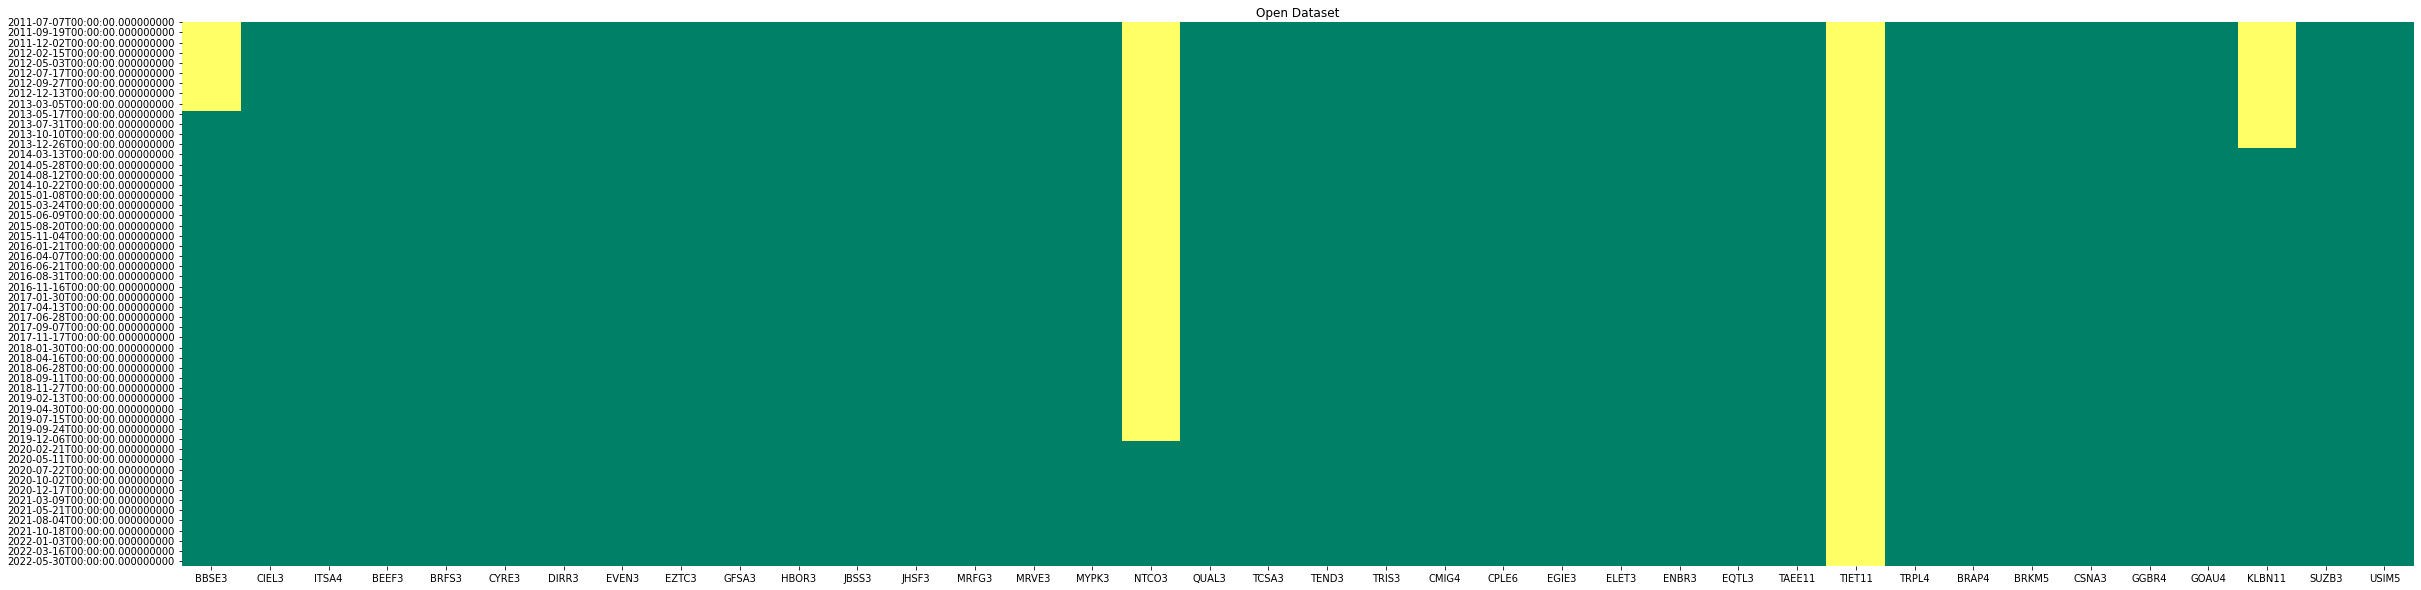

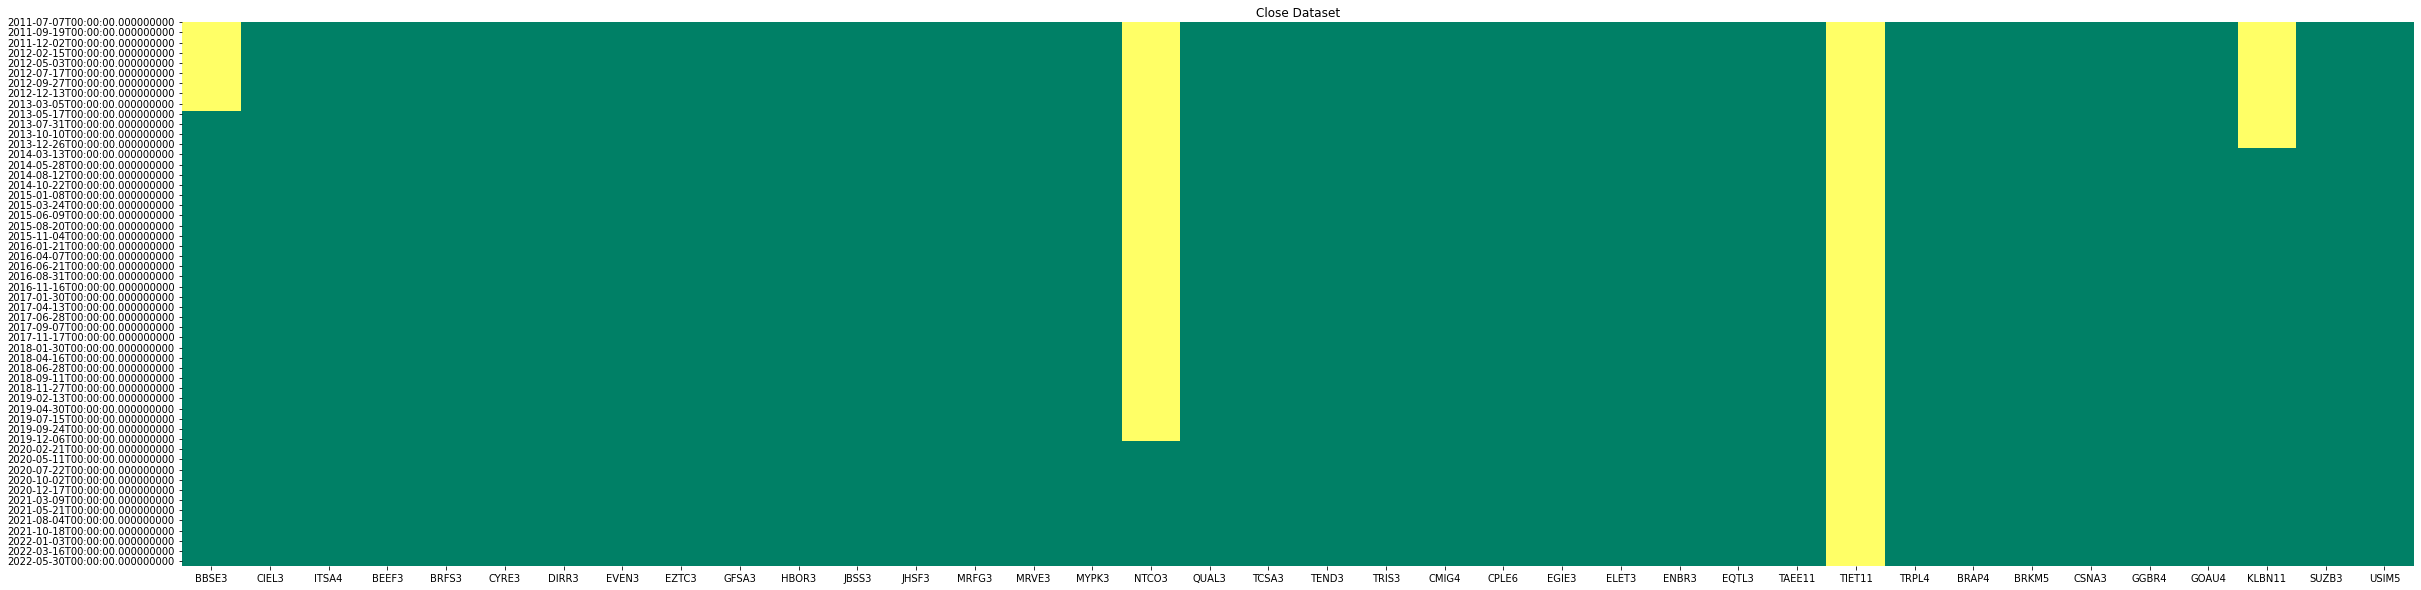

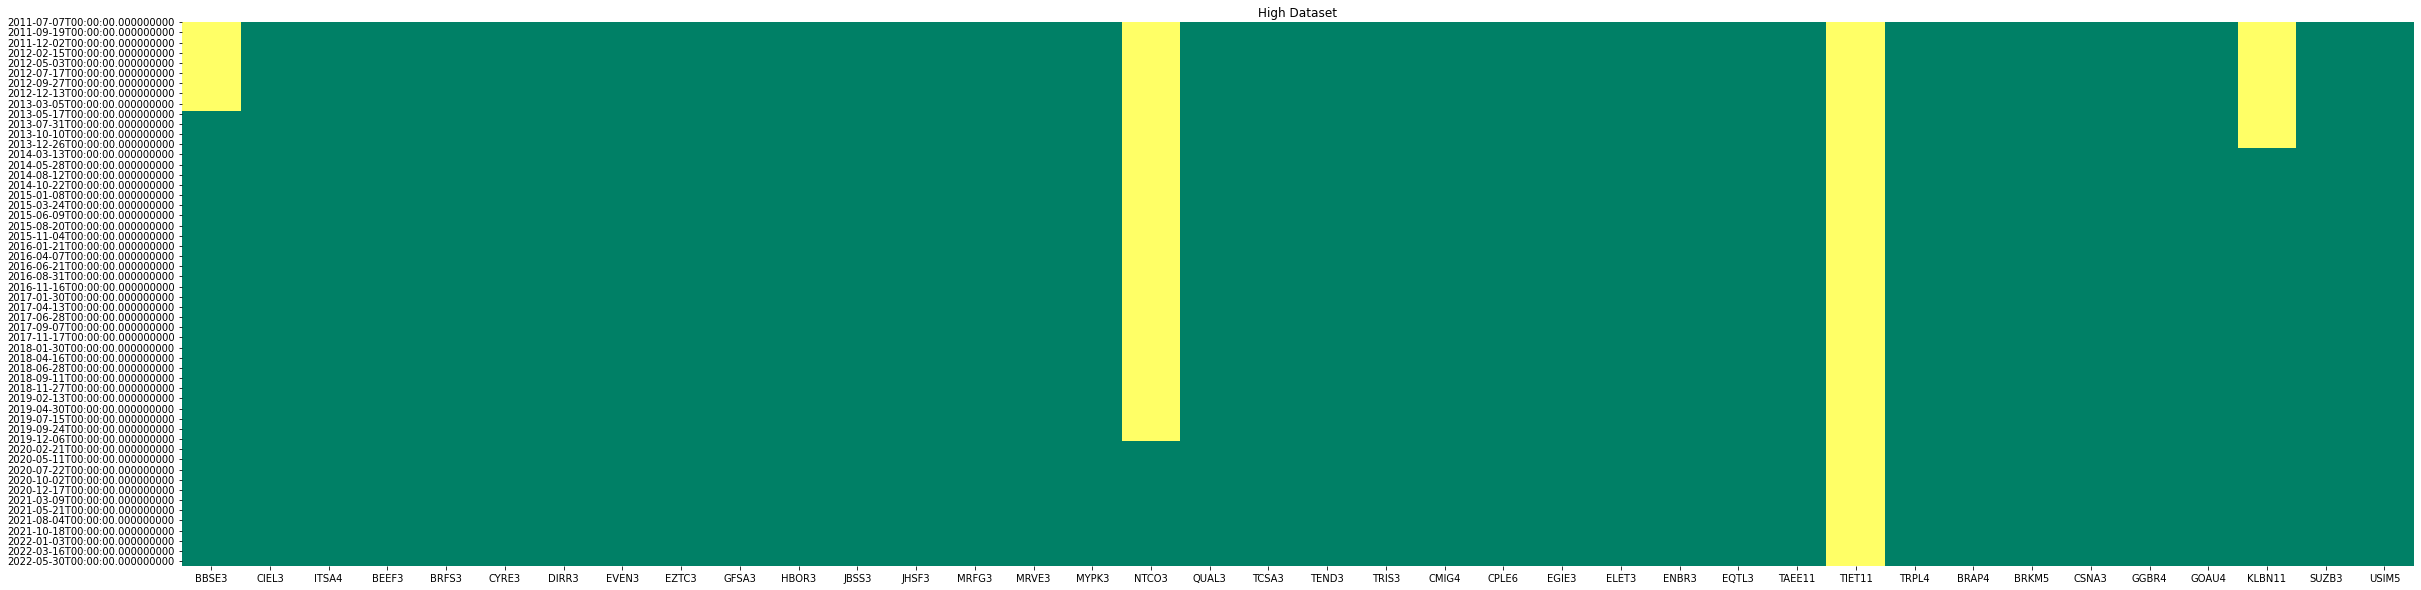

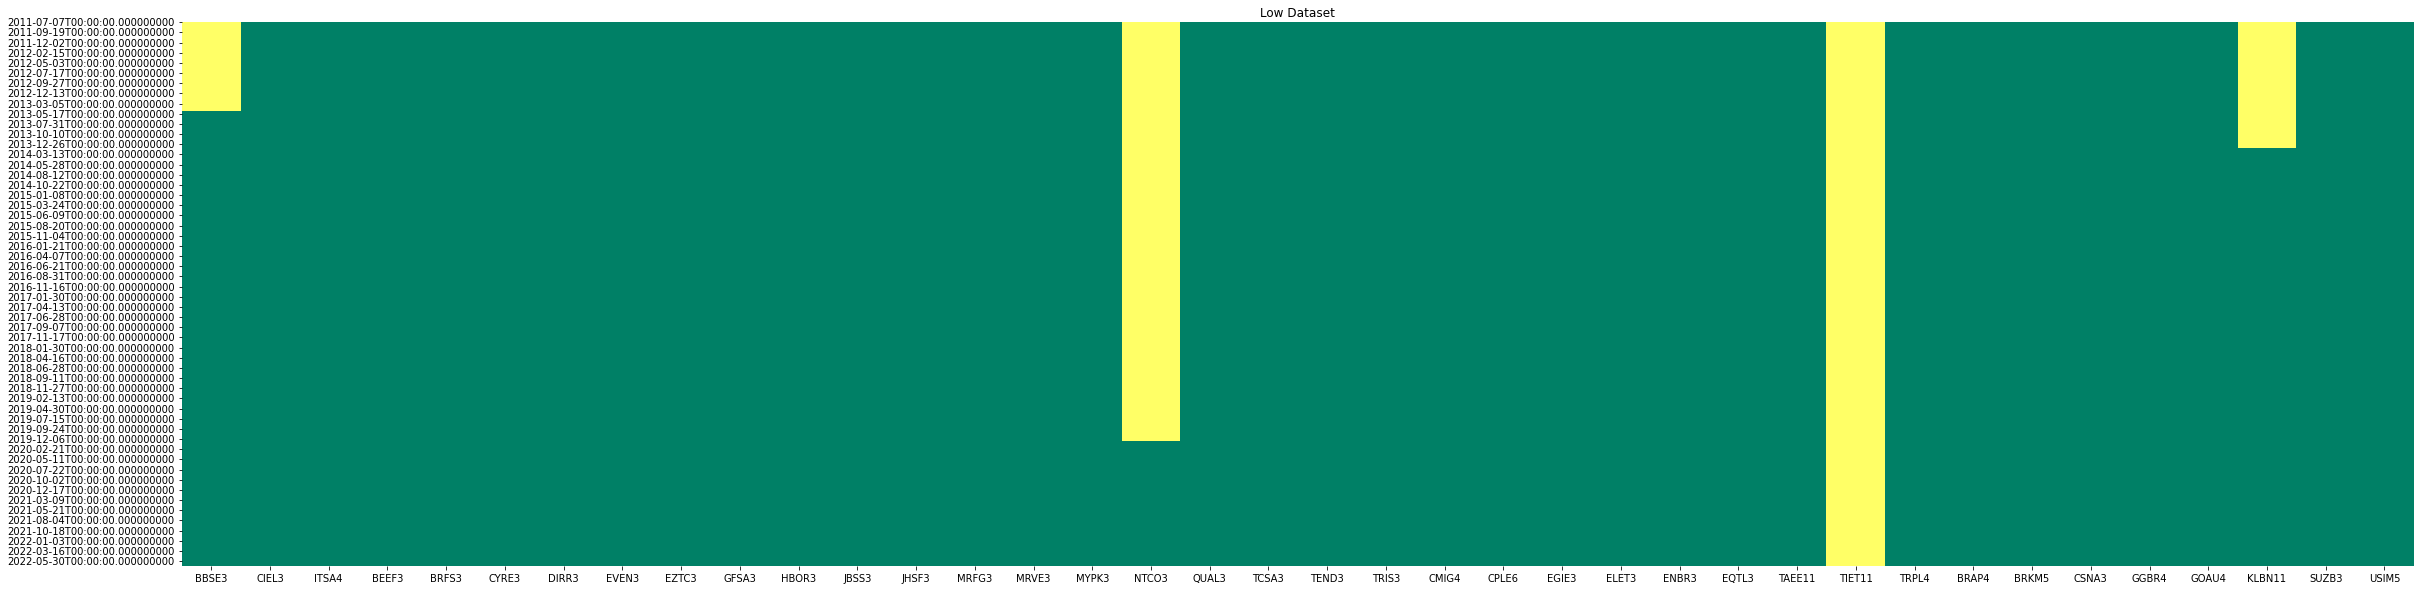

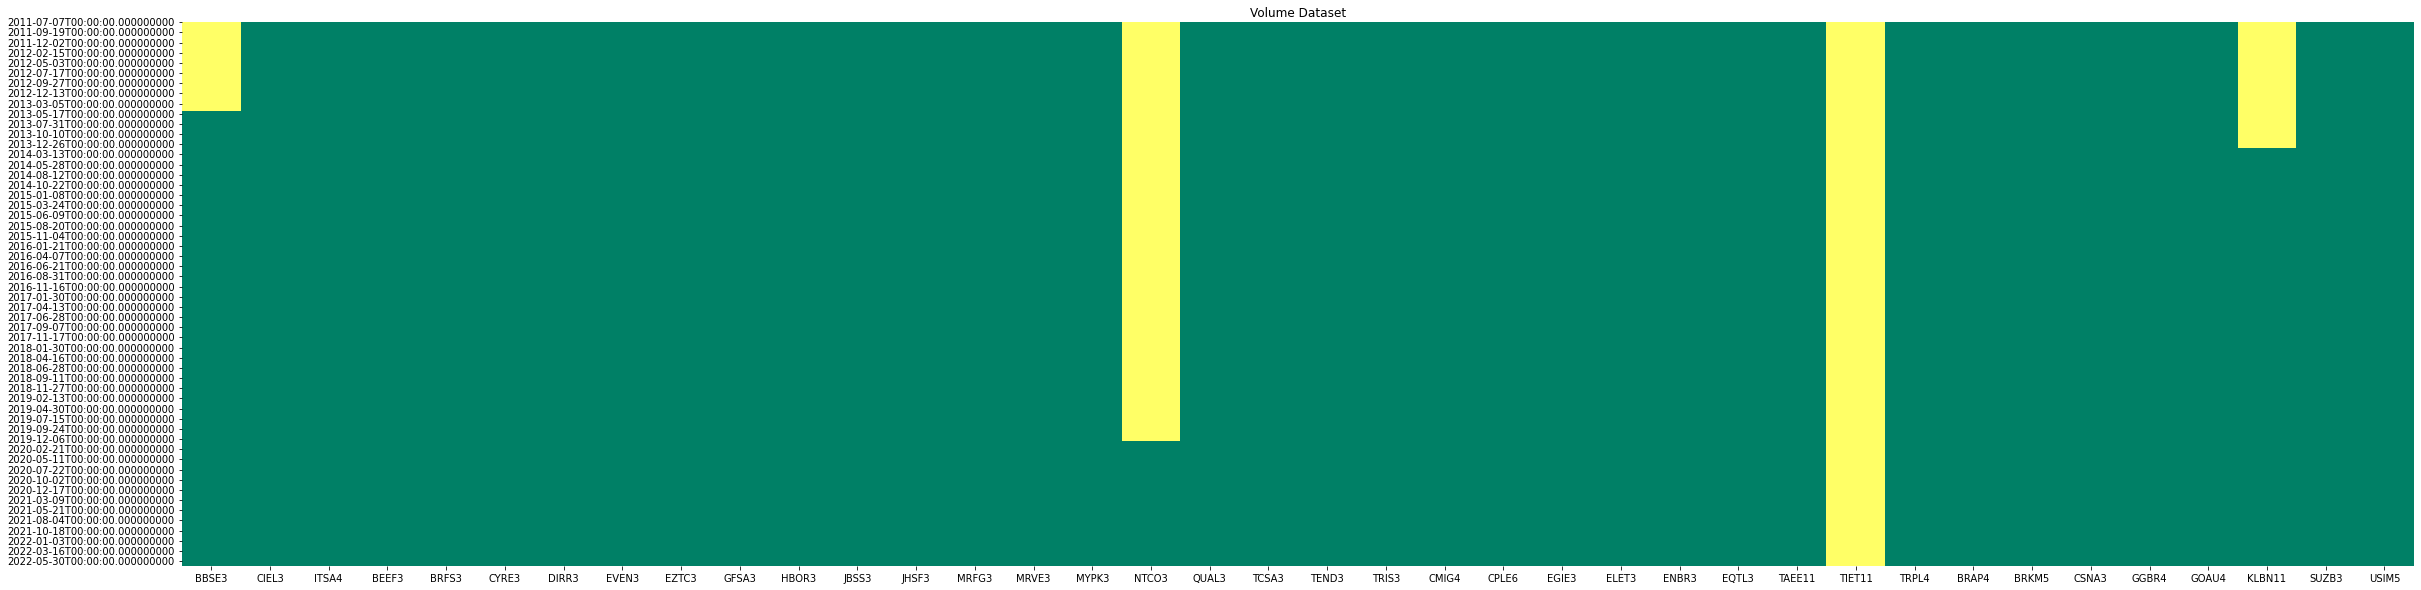

In [51]:
for name, datasets in ativos_data_sets:
    output=datasets.copy()

    plt.figure(figsize=(40,10))
    sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer').set(title=name)
    

In [112]:
clean_ativos_data_sets = []

symbols = set()

for cod in tqdm(todos_cod_dos_ativos):
    if todos_cod_dos_ativos[cod] >= MIN_INDICES:
        symbols.add(cod)

for name, datasets in ativos_data_sets:
    clean_df = datasets.loc[:, datasets.isnull().mean() < .01].copy()
    columns_set = set(x for x in clean_df.columns)
    symbols = symbols.intersection(columns_set)

    clean_ativos_data_sets.append([name, clean_df])

    
for name, datasets in tqdm(clean_ativos_data_sets):
    if symbols.difference(set(datasets.columns)):
        raise Exception(f"Dataset {name}, está sem a coluna {symbols.difference(set(datasets.columns))}")
    print(f"{name} is correct")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 29006.25it/s]

Open Dataset is correct
Close Dataset is correct
High Dataset is correct
Low Dataset is correct
Volume Dataset is correct


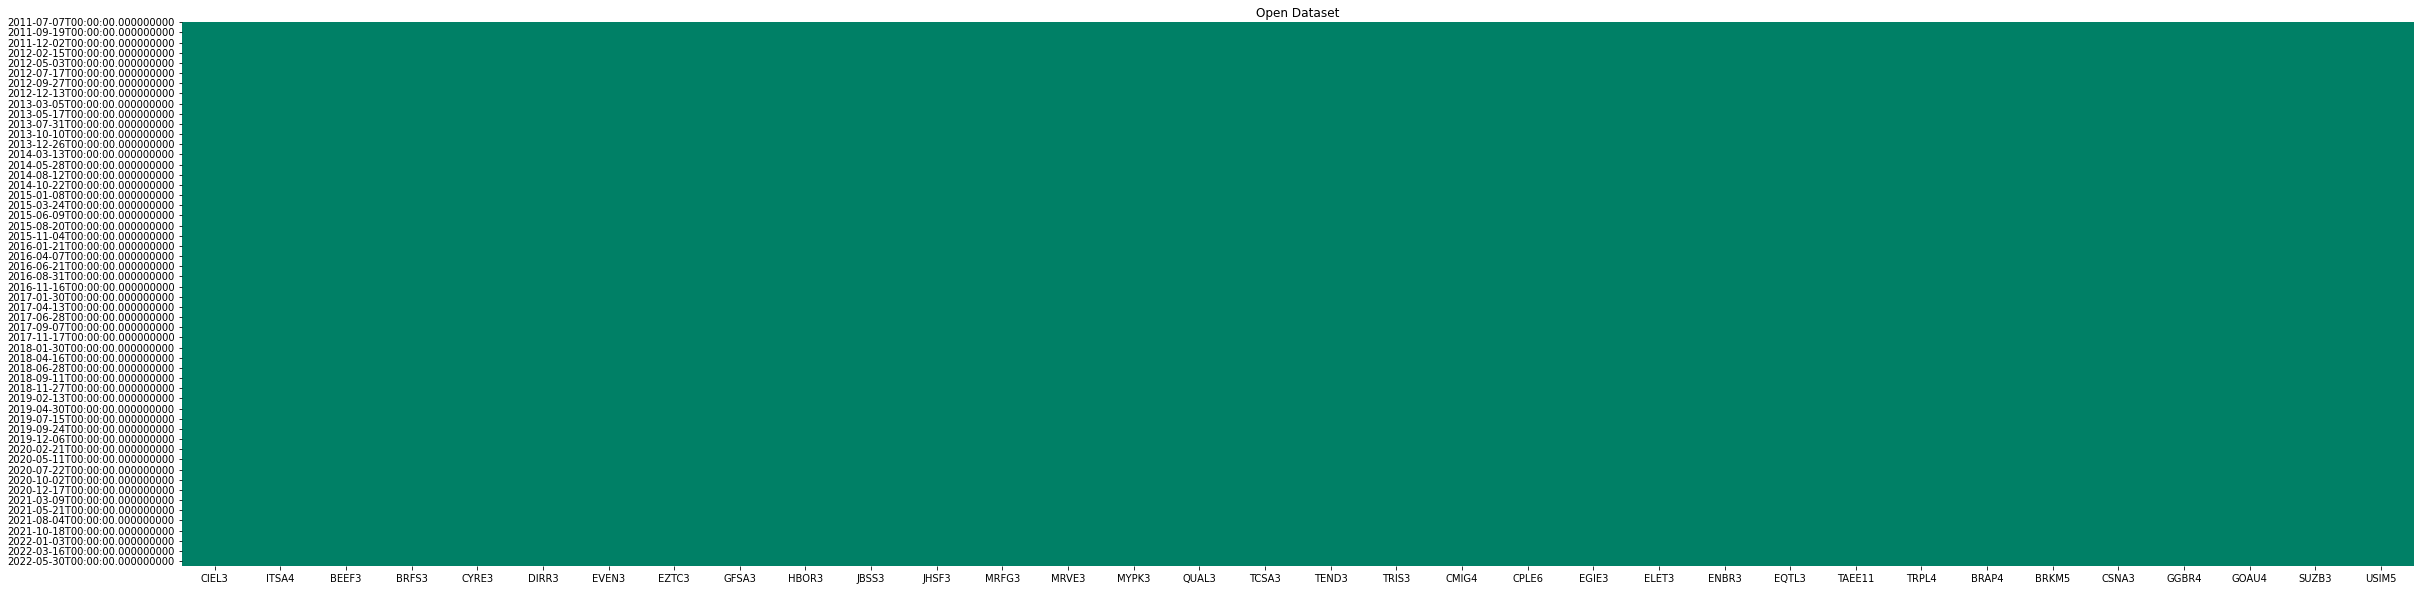

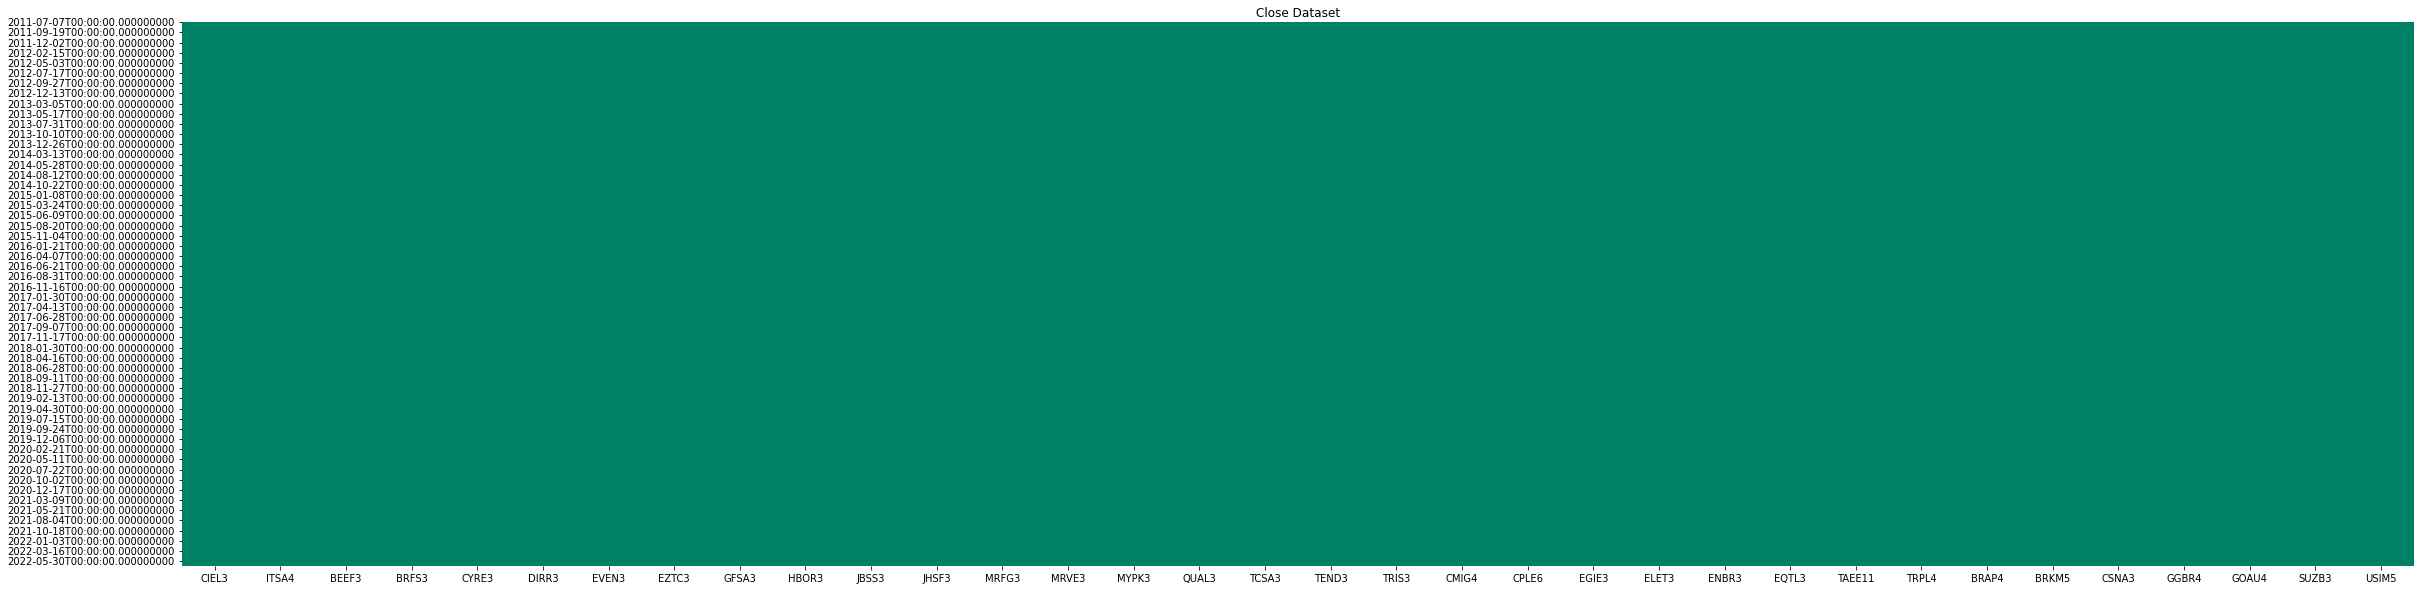

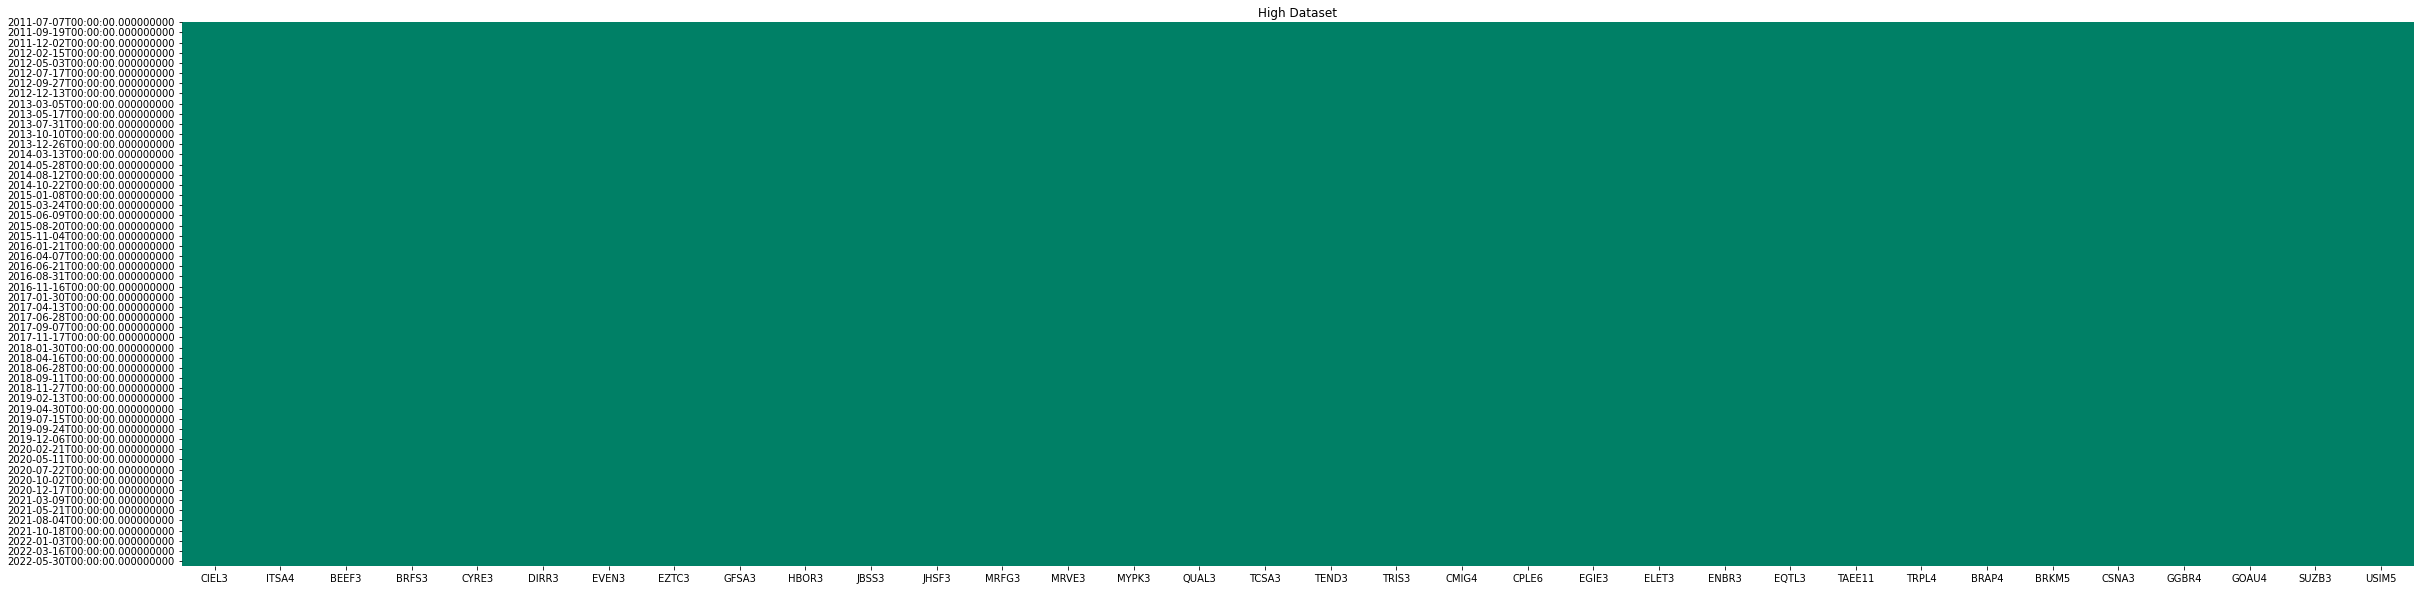

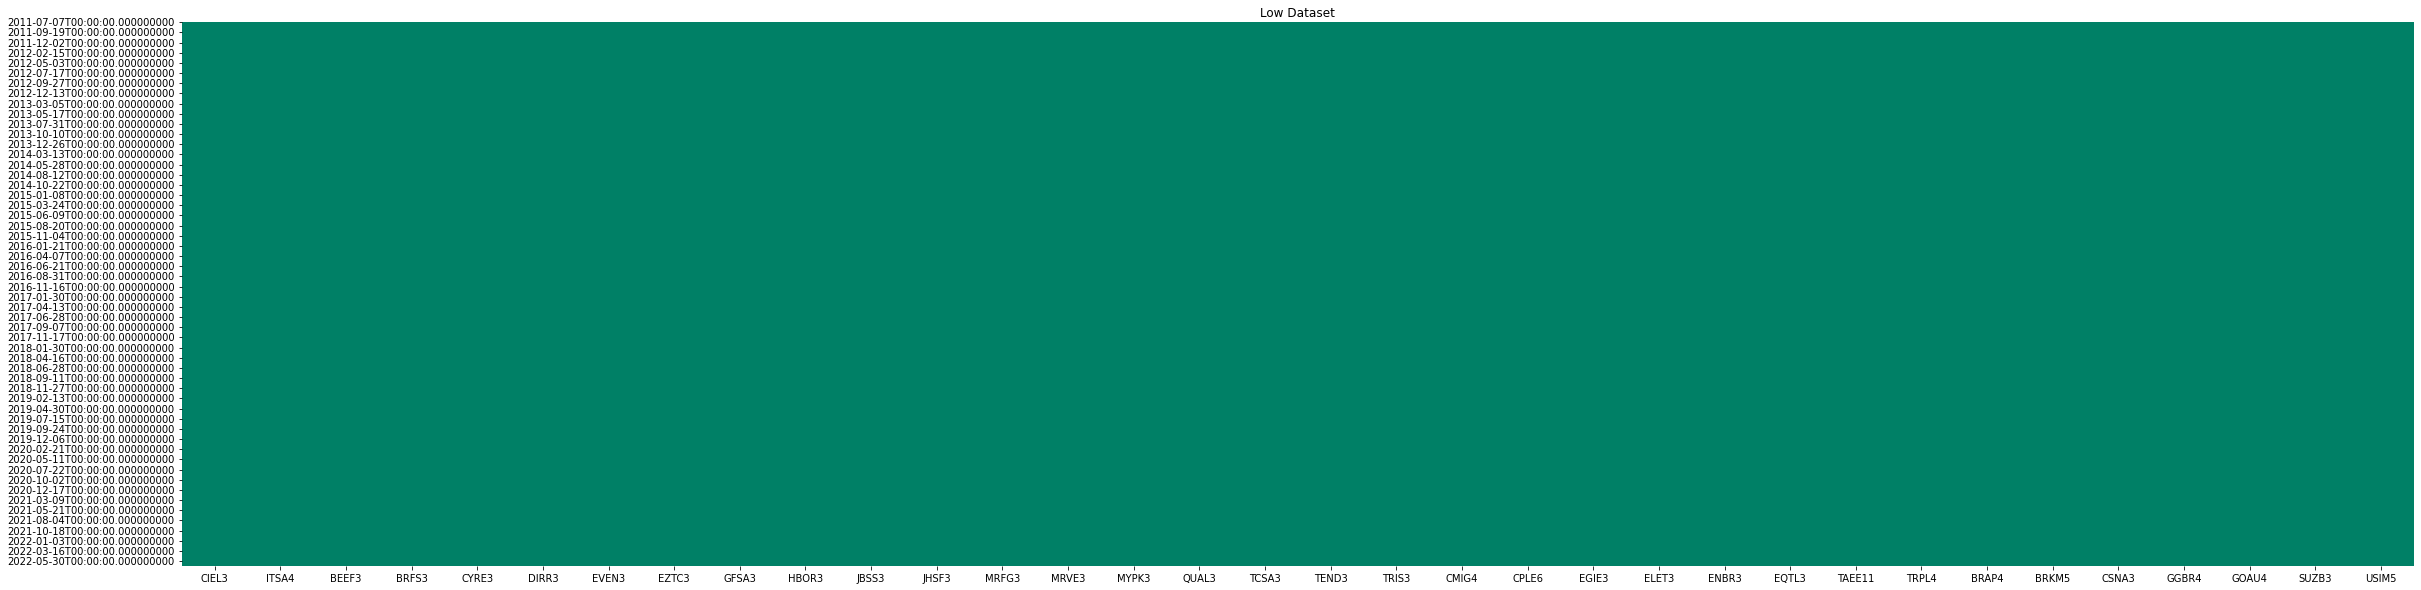

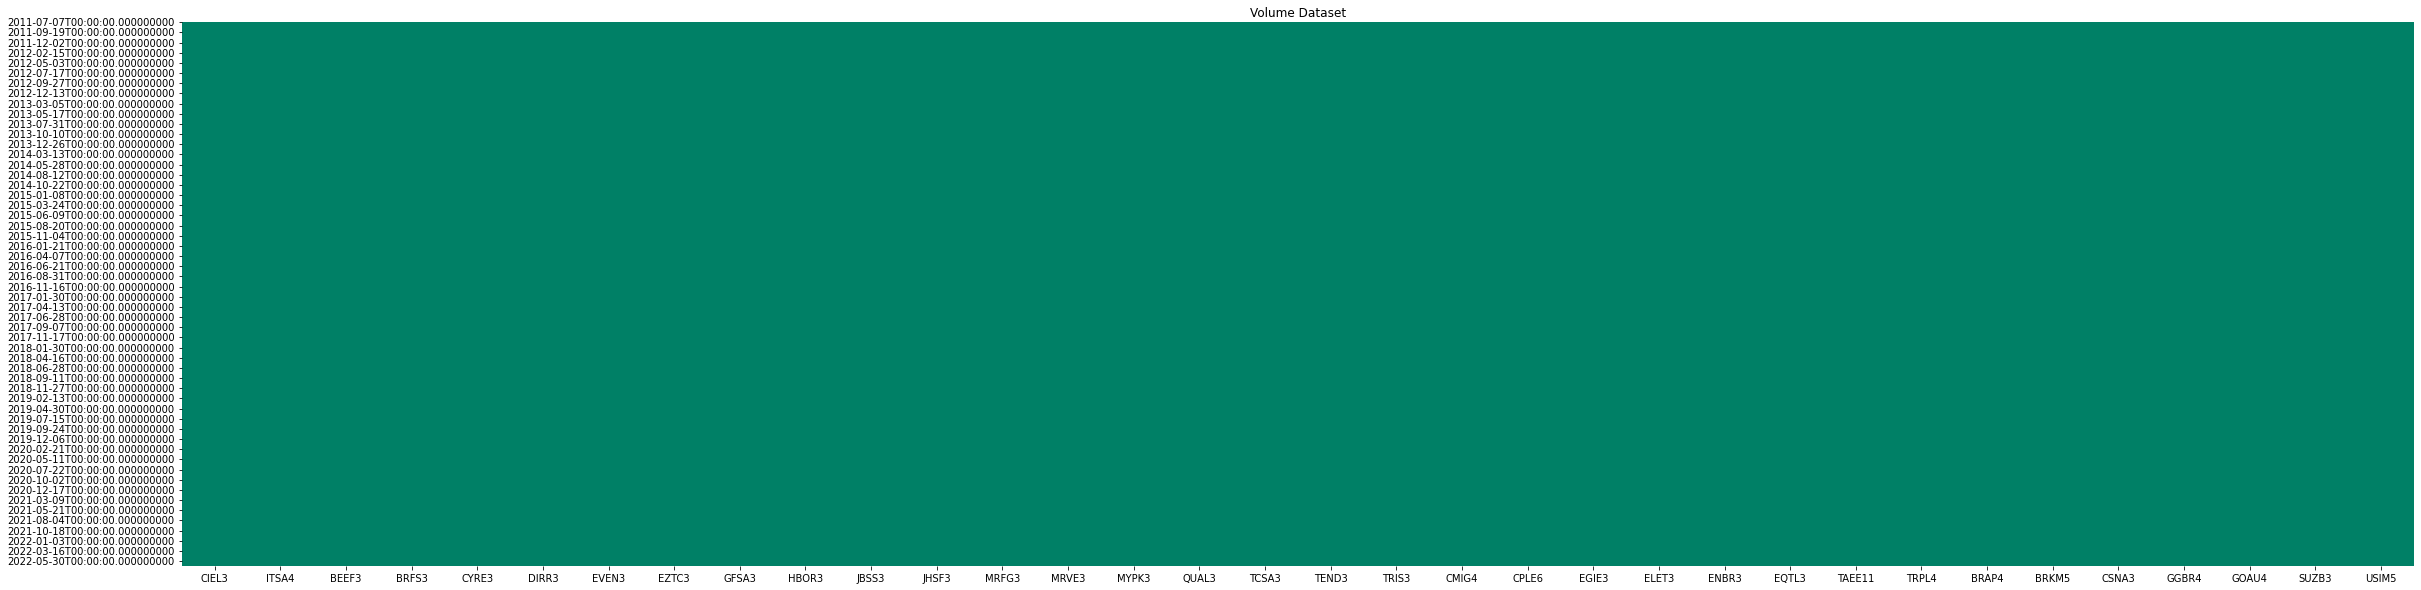

In [113]:
for name, datasets in clean_ativos_data_sets:
    output=datasets.copy()

    plt.figure(figsize=(40,10))
    sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer').set(title=name)

In [128]:
medias_dos_volumes_de_cada_ativo = {}

porcentil_70 = outVolume.mean().sort_values(ascending=False)[0:30]

porcentil_70

ITSA4     2.372088e+07
USIM5     1.438486e+07
CIEL3     1.436689e+07
CMIG4     1.115863e+07
GGBR4     1.070481e+07
GOAU4     9.349602e+06
JBSS3     9.263144e+06
NTCO3     8.801269e+06
CSNA3     8.679631e+06
CPLE6     8.480447e+06
EQTL3     5.711370e+06
BRFS3     4.999631e+06
MRFG3     4.879512e+06
BBSE3     4.789964e+06
MRVE3     4.503488e+06
CYRE3     3.999507e+06
KLBN11    3.854878e+06
ELET3     3.575492e+06
BEEF3     2.873286e+06
SUZB3     2.864143e+06
BRAP4     2.545857e+06
QUAL3     2.406367e+06
ENBR3     2.386683e+06
GFSA3     2.356333e+06
JHSF3     2.211958e+06
BRKM5     2.203674e+06
EVEN3     1.665700e+06
TRPL4     1.460750e+06
TAEE11    1.279455e+06
EGIE3     1.199566e+06
dtype: float64

In [129]:
porcentil_70.keys()

Index(['ITSA4', 'USIM5', 'CIEL3', 'CMIG4', 'GGBR4', 'GOAU4', 'JBSS3', 'NTCO3',
       'CSNA3', 'CPLE6', 'EQTL3', 'BRFS3', 'MRFG3', 'BBSE3', 'MRVE3', 'CYRE3',
       'KLBN11', 'ELET3', 'BEEF3', 'SUZB3', 'BRAP4', 'QUAL3', 'ENBR3', 'GFSA3',
       'JHSF3', 'BRKM5', 'EVEN3', 'TRPL4', 'TAEE11', 'EGIE3'],
      dtype='object')

### Questão 2: 

### Questão 3: 

### Questão 4: 

### Questão 5: 

### Questão 6: 